# Prediksi Keberlanjutan Langganan Pelanggan PT DQLab
# Business Understanding

### Latar Belakang Bisnis
PT DQLab adalah perusahaan yang menyediakan layanan makanan siap saji sehat. Dalam upaya meningkatkan retensi pelanggan dan efisiensi strategi pemasaran, perusahaan ingin memahami faktor-faktor yang memengaruhi keberlanjutan langganan pelanggan.

### Tujuan Proyek
Mengembangkan model klasifikasi otomatis untuk memprediksi apakah seorang pelanggan akan melanjutkan atau menghentikan langganan layanan makanan sehat. Hasil prediksi ini akan digunakan untuk:

- Menyusun strategi retensi pelanggan

- Menargetkan promosi secara lebih efektif

- Mengidentifikasi pelanggan berisiko berhenti berlangganan

### Permasalahan Bisnis
Perusahaan belum memiliki sistem prediktif yang dapat mengidentifikasi pelanggan yang berpotensi berhenti berlangganan. Tanpa sistem ini, strategi pemasaran dan retensi bersifat umum dan kurang efisien.

### Tujuan Analitik
Membangun model klasifikasi berbasis Decision Tree untuk memprediksi status langganan pelanggan (berlanjut atau berhenti) berdasarkan atribut pelanggan.



## Data Understanding
### Sumber Data
- Nama File: churn_analysis_train.xlsx

- Format: Excel

- Jumlah Kolom: 10

- Jumlah Baris: 499

### Deskripsi Fitur


- ID_Customer	: ID unik untuk setiap pelanggan
- Jenis_kelamin :	Jenis kelamin pelanggan
- umur	:	Usia pelanggan dalam tahun (Numerik)
- membership_program:	Durasi program membership dalam bulan
- using_reward :	Status penggunaan reward (Yes, No)
- pembayaran : Kategorikal	Metode pembayaran (Cash, Bank Transfer)
- Subscribe_brochure	: Kategorikal	Status langganan brosur promosi (Yes, No, Email)
- harga_per_bulan :		Biaya langganan per bulan (dalam Rupiah)
- jumlah_harga_langganan : Numerik	Total biaya langganan selama periode membership
- churn :	Target variabel: status berhenti langganan (Yes = churn, No = tetap)

## Data Preparation
- Import dan Load Dataset
- Pemeriksaan Awal
- Pembersihan Data
- Mengubah Kolom Non-Numerik Menjadi Kolom Numerik
- Pisahkan Fitur dan Target

## Modeling

Setelah data dipersiapkan dan dibersihkan, tahap modeling bertujuan untuk membangun model klasifikasi yang mampu memprediksi status langganan pelanggan (berlanjut atau berhenti).

Aktivitas Utama:
- Pemilihan fitur dan target: Fitur-fitur seperti umur, durasi membership, penggunaan reward, metode pembayaran, dan biaya langganan digunakan sebagai input. Target yang diprediksi adalah variabel churn.

- Pembagian dataset: Data dibagi menjadi data pelatihan dan data pengujian untuk memastikan model dapat melakukan generalisasi terhadap data baru.

- Pemilihan algoritma: Algoritma Decision Tree dipilih karena interpretabilitasnya yang tinggi dan kemampuannya menangani data kategorikal dan numerik.



## Evaluation
Evaluasi dilakukan untuk menilai performa model dan memastikan bahwa model tidak hanya bekerja baik pada data pelatihan, tetapi juga pada data yang belum pernah dilihat sebelumnya.

Teknik Evaluasi yang Digunakan:
- Akurasi: Mengukur proporsi prediksi yang benar terhadap total data pengujian.

- K-Fold Cross Validation: Digunakan untuk mengevaluasi stabilitas model dengan membagi data ke dalam beberapa lipatan dan menghitung rata-rata akurasi.

- Classification Metrics: Precision, recall, dan F1-score digunakan untuk memahami performa model secara lebih mendalam, terutama dalam kasus ketidakseimbangan kelas.


## Deployment
Setelah model dibangun dan dievaluasi, tahap deployment bertujuan untuk mengintegrasikan model ke dalam sistem operasional perusahaan agar hasil prediksi dapat digunakan secara nyata dalam pengambilan keputusan.

Import dan Load Dataset

In [1]:
import pandas as pd
pd.set_option('display.max_column', 20)

# Load data dari URL
df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

Pemeriksaan Awal

In [2]:
# Menampilkan 5 baris pertama
print(df.head())

# Informasi struktur data
print(df.info())

# Statistik deskriptif untuk kolom numerik
print(df.describe())


  ID_Customer Jenis_kelamin  umur  membership_program using_reward  \
0   1005-CTMP     Perempuan    41                  36           No   
1   1007-STSJ     Laki-laki    27                  36          Yes   
2   1012-NCGH     Laki-laki    45                  36           No   
3   1014-WWBN     Perempuan    33                  12           No   
4   1024-HYUA     Perempuan    38                  12           No   

      pembayaran Subscribe_brochure  harga_per_bulan  jumlah_harga_langganan  \
0           Cash                 No            10000                  360000   
1  Bank Transfer              Email            10000                  360000   
2           Cash                 No            10000                  360000   
3  Bank Transfer                Yes            10000                  120000   
4           Cash                 No            10000                  120000   

  churn  
0   Yes  
1   Yes  
2    No  
3    No  
4    No  
<class 'pandas.core.frame.DataFrame'>


Pembersihan Data

In [3]:
print(df.isnull().sum())


ID_Customer               0
Jenis_kelamin             0
umur                      0
membership_program        0
using_reward              0
pembayaran                0
Subscribe_brochure        0
harga_per_bulan           0
jumlah_harga_langganan    0
churn                     0
dtype: int64


Menghapus Kolom ID_Customer

In [4]:
#menghilangkan kolom id dari data frame dikarenakan kolom id tidak relevan untuk dijadikan input ataupun output dalam tugas klasifikasi
df.drop('ID_Customer', axis=1, inplace=True)

print(df.head())

  Jenis_kelamin  umur  membership_program using_reward     pembayaran  \
0     Perempuan    41                  36           No           Cash   
1     Laki-laki    27                  36          Yes  Bank Transfer   
2     Laki-laki    45                  36           No           Cash   
3     Perempuan    33                  12           No  Bank Transfer   
4     Perempuan    38                  12           No           Cash   

  Subscribe_brochure  harga_per_bulan  jumlah_harga_langganan churn  
0                 No            10000                  360000   Yes  
1              Email            10000                  360000   Yes  
2                 No            10000                  360000    No  
3                Yes            10000                  120000    No  
4                 No            10000                  120000    No  


###Mengubah Kolom Non-Numerik Menjadi Kolom Numerik

In [5]:
#mengubah nilai "Perempuan" menjadi 1 dan "Laki-laki" menjadi 0
df['Jenis_kelamin']= df['Jenis_kelamin'].map(
	lambda value: 1 if value == 'Perempuan' else 0)

#mengubah nilai using_reward "Yes" menjadi 1 dan "No" menjadi 0
df['using_reward']= df['using_reward'].map(
	lambda value: 1 if value == 'Yes' else 0)

#mengubah nilai pembayaran "Credit" menjadi 2, "Bank Transfer" menjadi 1 dan "Cash" menjadi 0
df['pembayaran']= df['pembayaran'].map(
    lambda value: 2 if value == 'Credit'
    else 1 if value == 'Bank Transfer'
    else 0)

#mengubah nilai subskripsi brosur "No" menjadi 0 dan nilai lainnya ("Email" dan "Yes") menjadi 1
df['Subscribe_brochure']= df['Subscribe_brochure'].map(
    lambda value: 1 if value == 'No'  else 0)

#mengubah nilai "Yes" menjadi 1 dan "No" menjadi 0
df['churn'] = df['churn'].map(
	lambda value: 1 if value == 'Yes' else 0)

#menampilkan isi dari variabel 'df' setelah perubahan
print(df.head())

   Jenis_kelamin  umur  membership_program  using_reward  pembayaran  \
0              1    41                  36             0           0   
1              0    27                  36             1           1   
2              0    45                  36             0           0   
3              1    33                  12             0           1   
4              1    38                  12             0           0   

   Subscribe_brochure  harga_per_bulan  jumlah_harga_langganan  churn  
0                   1            10000                  360000      1  
1                   0            10000                  360000      1  
2                   1            10000                  360000      0  
3                   0            10000                  120000      0  
4                   1            10000                  120000      0  


**Feature Matrix dan Target**

Langkah berikutnya aku akan membuat feature matrix atau data input yang merupakan variabel bebas (X) serta target yang meupakan variabel bergantung (y) untuk persoalan churn analysis ini.

In [6]:
#menyimpan atribut diagnosis ke dalam variabel y dan disimpan ke dalam array 1D atau array target
y = df.pop('churn').to_numpy()

#mengubah seluruh data dalam df ke dalam format array 2D atau matrix feature X (jumlah data, jumlah atribut)
X = df.to_numpy()

#memastikan jumlah data dan jumlah atribut data input
print('X:', X.shape)
#memastikan jumlah data pada variabel y
print('y:', y.shape)

X: (499, 8)
y: (499,)


**Akurasi Data Training**

Aku akan melihat seberapa besar nilai akurasi yang aku peroleh ketika memodelkan analisis churn pelanggan berdasarkan variabel bebas X dan variabel bergantung y untuk keseluruhan butir data. Di sini aku akan memodelkan dengan decision tree.

In [7]:
#mengimport model 'DecisionTreeClassifier' dari library scikit-learn tepatnya dari modul tree.
from sklearn.tree import DecisionTreeClassifier

#inisialisasi model
model = DecisionTreeClassifier(random_state=12)

#melatih model berdasarkan data input (X) dan label (y)
model.fit(X, y)

#melakukan prediksi terhadap setiap data dalam X dan menyimpan hasil prediksi dalam array 'y_pred'
y_pred = model.predict(X)

#mengimport fungsi untuk menghitung akurasi dari library scikit-learn tepatnya dari modul metrics.
from sklearn.metrics import accuracy_score

#menghitung nilai akurasi dari hasil prediksi (y_pred) dengan label aktual yang dimiliki oleh setiap data (y) nilai akurasi dihitung dengan menggunakan total prediksi benar dibagi dengan total data yang diprediksi
score = accuracy_score(y,y_pred)

#menampilkan hasil akurasi dalam persen
print('Hasil akurasi model: %.2f %%' % (100*score))

Hasil akurasi model: 90.78 %


**Train and Test Split**

Selanjutnya, dataset yang merupakan variabel bebas X dan variabel bergantung y yang dibagi menjadi bagian data latih (training dataset) dan bagian data uji (testing dataset).

In [8]:
#fungsi untuk membagi data dan label ke dalam dua bagian (data latih dan data testing) secara acak tersedia dalam library scikit-learn.model_selection
from sklearn.model_selection import train_test_split

#X_train dan y_train akan kita gunakan sebagai data untuk melatih model X_test dan y_test akan kita gunakan sebagai data testing untuk mengetahui kemampuan model untuk data yang belum pernah ia jumpai
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = DecisionTreeClassifier(random_state=12)

#melatih model berdasarkan data latih (X_train) dan labelnya (y_train)
model.fit(X_train, y_train)

#melakukan prediksi terhadap setiap data testing (X_test) dan menyimpan hasil prediksi dalam array 'y_pred'
y_pred = model.predict(X_test)

#menghitung nilai akurasi dari hasil prediksi (y_pred) dengan label aktual yang dimiliki oleh setiap data test (y_test)
score = accuracy_score(y_test,y_pred)

#menampilkan hasil akurasi dalam persen
print('Hasil akurasi model: %.2f %%' % (100*score))

Hasil akurasi model: 43.00 %


### K-Fold Cross Validation

In [9]:
#mengimport fungsi K-Fold dari modul model_selection pada library scikit-learn
from sklearn.model_selection import KFold

#men-set nilai K = 10
kf = KFold(n_splits= 10, shuffle=True,random_state = 12)

#menyesuaikan nilai K dengan jumlah data pada variabel X
kf.get_n_splits(X)

#mengulangi proses pelatihan dan evaluasi pada setiap kelompok data yang telah dibagi melalui object KFold
for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train,y_train)

	y_pred = model.predict(X_test)
	score = accuracy_score(y_test,y_pred)

	print('Hasil akurasi model: %.2f %%' % (100*score))

Hasil akurasi model: 54.00 %
Hasil akurasi model: 58.00 %
Hasil akurasi model: 54.00 %
Hasil akurasi model: 36.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 46.00 %
Hasil akurasi model: 44.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 62.00 %
Hasil akurasi model: 44.90 %


### Akurasi Rata-Rata Model Klasifikasi

In [10]:
#men-set nilai K = 10
kf = KFold(n_splits= 10, shuffle=True,random_state = 12)

#menyesuaikan nilai K dengan jumlah data pada variabel X
kf.get_n_splits(X)

total_score = 0

#mengulangi proses pelatihan dan evaluasi pada setiap kelompok data yang telah dibagi melalui object KFold
for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train,y_train)

	y_pred = model.predict(X_test)
	score = accuracy_score(y_test,y_pred)

	total_score += score
	print('Hasil akurasi model: %.2f %%' % (100*score))

print('\nRata-rata akurasi model: %.2f %%' % (100*total_score/10))

Hasil akurasi model: 54.00 %
Hasil akurasi model: 58.00 %
Hasil akurasi model: 54.00 %
Hasil akurasi model: 36.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 46.00 %
Hasil akurasi model: 44.00 %
Hasil akurasi model: 56.00 %
Hasil akurasi model: 62.00 %
Hasil akurasi model: 44.90 %

Rata-rata akurasi model: 51.09 %


Confusion Matrix

In [11]:
#library yang dapat kita gunakan untuk menghitung nilai confusion matrix
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=10, shuffle=True, random_state=12)

kf.get_n_splits(X)

#menyiapkan array berukuran 2 * 2 untuk  menyimpan informasi confusion matrix
import numpy as np
cm_result = np.zeros((2,2))
for train_index,test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train,y_train)

	y_pred = model.predict(X_test)

	#menghitung nilai confusion matrix berdasarkan label sebenarnya dan label hasil prediksi model
	cm_result += confusion_matrix(y_test, y_pred)

print('Confusion Matrix untuk K-Fold = 10')
print(cm_result)

Confusion Matrix untuk K-Fold = 10
[[125. 112.]
 [132. 130.]]


Precision, Recall, dan F1

In [12]:
#library yang dapat kita gunakan untuk menghitung nilai precision, recall dan F1-Score
from sklearn.metrics import classification_report

kf = KFold(n_splits=10, shuffle=True, random_state=12)

kf.get_n_splits(X)

#variabel untuk menyimpan label ground-truth atau label referensi dari setiap iterasi
y_true_all = []

#variabel untuk menyimpan label hasil prediksi dari setiap iterasi
y_pred_all = []

for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train, y_train)

	y_pred = model.predict(X_test)

	#menambahkan label ground_truth ke dalam variabel
	y_true_all.extend(y_test)
	#menambahkan label prediksi ke dalam variabel
	y_pred_all.extend(y_pred)

print(classification_report(y_true_all, y_pred_all))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51       237
           1       0.54      0.50      0.52       262

    accuracy                           0.51       499
   macro avg       0.51      0.51      0.51       499
weighted avg       0.51      0.51      0.51       499



Berdasarkan output pada potongan kode di atas, saat label 0 dianggap sebagai kelas positif, nilai Precision sama dengan 0.48 dan nilai Recall sama dengan 0.53 sehingga nilai F1-Score untuk label sama dengan 0.50. Di sisi lain, saat label 1 dianggap sebagai kelas positif, nilai Precision sama dengan 0.53 dan nilai Recall sama dengan 0.48 sehingga nilai F1-Score sama dengan 0.50. Nilai support untuk baris dengan label 0 menyatakan jumlah data dengan label 0 pada list “y_true_all”, sedangkan nilai support untuk baris dengan label 0 menyatakan jumlah data dengan label 1 pada list “y_true_all”



Kemudian, baris akurasi pada output menyatakan nilai akurasi (total prediksi benar dibagi dengan total data yang diprediksi); baris macro avg menyatakan nilai rata-rata Precision, Recall, dan F1-Score dari masing-masing kelas yang telah dihitung sebelumnya; dan baris weighted avg menyatakan nilai rata-rata Precision, Recall, dan F1-Score dari masing-masing kelas yang telah dihitung dengan mempertimbangkan jumlah nilai support.

Precision & Recall Trade off

In [13]:
#library yang dapat kita gunakan untuk menghitung nilai precision recall trade-off
from sklearn.metrics import precision_recall_curve

kf = KFold(n_splits=10, shuffle=True, random_state=12)
kf.get_n_splits(X)

#variabel untuk menyimpan label ground-truth atau label referensi dari setiap iterasi
y_true_all = []

#variabel untuk menyimpan label hasil prediksi dari setiap iterasi
y_pred_all = []

for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train, y_train)

	y_pred = model.predict_proba(X_test)

	#menambahkan label ground_truth ke dalam variabel
	y_true_all.extend(y_test)
	#menambahkan label prediksi ke dalam variabel
	y_pred_all.extend(y_pred[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_true_all, y_pred_all)

#mengiterasi setiap nilai threshold, precision dan recall yang dihasilkan oleh fungsi precision_recall_curve
for i in range(0,len(thresholds)):
	print('Saat nilai threshold: %.2f maka nilai Precision: %.2f dan Recall: %.2f' % (thresholds[i], precisions[i], recalls[i]))

Saat nilai threshold: 0.00 maka nilai Precision: 0.53 dan Recall: 1.00
Saat nilai threshold: 0.33 maka nilai Precision: 0.52 dan Recall: 0.56
Saat nilai threshold: 0.50 maka nilai Precision: 0.53 dan Recall: 0.56
Saat nilai threshold: 0.67 maka nilai Precision: 0.54 dan Recall: 0.50
Saat nilai threshold: 1.00 maka nilai Precision: 0.53 dan Recall: 0.48


Visualisasi Precision & Recall Trade off

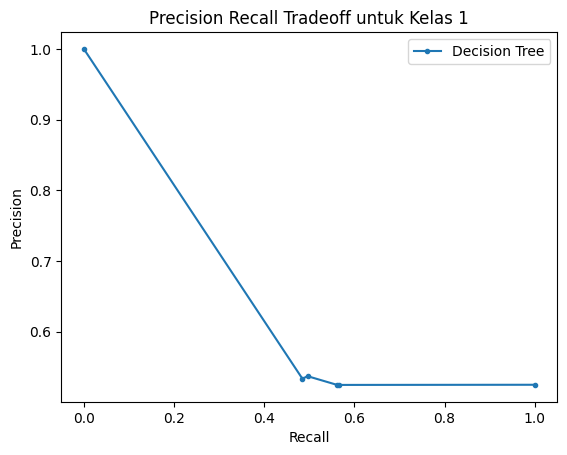

In [14]:
import matplotlib.pyplot as plt

plt.plot(recalls, precisions, marker='.', label='Decision Tree')

#axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision Recall Tradeoff untuk Kelas 1")

#show the legend
plt.legend()

#show the plot
plt.show()

Matthews Correlation Coefficient

In [15]:
#library yang dapat kita gunakan untuk menghitung nilai Matthews Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

kf = KFold(n_splits=10, shuffle=True, random_state=12)
kf.get_n_splits(X)

#variabel untuk menyimpan label ground-truth atau label referensi dari setiap iterasi
y_true_all = []

#variabel untuk menyimpan label hasil prediksi dari setiap iterasi
y_pred_all = []

for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	model = DecisionTreeClassifier(random_state=12)
	model.fit(X_train, y_train)

	y_pred = model.predict(X_test)

	#menambahkan label ground_truth ke dalam variabel
	y_true_all.extend(y_test)
	#menambahkan label prediksi ke dalam variabel
	y_pred_all.extend(y_pred)

print('Nilai MCC: ', matthews_corrcoef(y_true_all, y_pred_all))

Nilai MCC:  0.023590378387462276
